# Lab4-Assignment about Named Entity Recognition and Classification

This notebook describes the assignment of Lab 4 of the text mining course. We assume you have succesfully completed Lab1, Lab2 and Lab3 as welll. Especially Lab2 is important for completing this assignment.

**Learning goals**
* going from linguistic input format to representing it in a feature space
* working with pretrained word embeddings
* train a supervised classifier (SVM)
* evaluate a supervised classifier (SVM)
* learn how to interpret the system output and the evaluation results
* be able to propose future improvements based on the observed results


## Credits
This notebook was originally created by [Marten Postma](https://martenpostma.github.io) and [Filip Ilievski](http://ilievski.nl) and adapted by Piek vossen

## [Points: 18] Exercise 1 (NERC): Training and evaluating an SVM using CoNLL-2003

**[4 point] a) Load the CoNLL-2003 training data using the *ConllCorpusReader* and create for both *train.txt* and *test.txt*:**

    [2 points]  -a list of dictionaries representing the features for each training instances, e..g,
    ```
    [
    {'words': 'EU', 'pos': 'NNP'}, 
    {'words': 'rejects', 'pos': 'VBZ'},
    ...
    ]
    ```

    [2 points] -the NERC labels associated with each training instance, e.g.,
    dictionaries, e.g.,
    ```
    [
    'B-ORG', 
    'O',
    ....
    ]
    ```

In [2]:
from nltk.corpus.reader import ConllCorpusReader
### Adapt the path to point to the CONLL2003 folder on your local machine
train = ConllCorpusReader('/Users/selmadissing/Documents/2. BSc Artificial Intelligence/Year 3/P4/Text Mining/ba-text-mining-2023-group52/lab_sessions/lab4/CONLL2003', 'train.txt', ['words', 'pos', 'ignore', 'chunk'])
training_features = []
training_gold_labels = []

for token, pos, ne_label in train.iob_words():
    a_dict = {'words': token, 'pos': pos}
    training_features.append(a_dict)
    training_gold_labels.append(ne_label)
print("First 10 training features: ", training_features[:10])
print("First 10 gold labels: ", training_gold_labels[:10])

First 10 training features:  [{'words': 'EU', 'pos': 'NNP'}, {'words': 'rejects', 'pos': 'VBZ'}, {'words': 'German', 'pos': 'JJ'}, {'words': 'call', 'pos': 'NN'}, {'words': 'to', 'pos': 'TO'}, {'words': 'boycott', 'pos': 'VB'}, {'words': 'British', 'pos': 'JJ'}, {'words': 'lamb', 'pos': 'NN'}, {'words': '.', 'pos': '.'}, {'words': 'Peter', 'pos': 'NNP'}]
First 10 gold labels:  ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-PER']


In [3]:
### Adapt the path to point to the CONLL2003 folder on your local machine
test = ConllCorpusReader('/Users/selmadissing/Documents/2. BSc Artificial Intelligence/Year 3/P4/Text Mining/ba-text-mining-2023-group52/lab_sessions/lab4/CONLL2003', 'test.txt', ['words', 'pos', 'ignore', 'chunk'])

test_features = []
test_gold_labels = []
for token, pos, ne_label in test.iob_words():
    a_dict = {'words': token, 'pos': pos}
    test_features.append(a_dict)
    test_gold_labels.append(ne_label)
print("First 10 test features: ", test_features[:10])
print("First 10 gold labels: ", test_gold_labels[:10])

First 10 test features:  [{'words': 'SOCCER', 'pos': 'NN'}, {'words': '-', 'pos': ':'}, {'words': 'JAPAN', 'pos': 'NNP'}, {'words': 'GET', 'pos': 'VB'}, {'words': 'LUCKY', 'pos': 'NNP'}, {'words': 'WIN', 'pos': 'NNP'}, {'words': ',', 'pos': ','}, {'words': 'CHINA', 'pos': 'NNP'}, {'words': 'IN', 'pos': 'IN'}, {'words': 'SURPRISE', 'pos': 'DT'}]
First 10 gold labels:  ['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O']


**[2 points] b) provide descriptive statistics about the training and test data:**
* How many instances are in train and test?
* Provide a frequency distribution of the NERC labels, i.e., how many times does each NERC label occur?
* Discuss to what extent the training and test data is balanced (equal amount of instances for each NERC label) and to what extent the training and test data differ?

Tip: you can use the following `Counter` functionality to generate frequency list of a list:

In [4]:
from collections import Counter
import pandas as pd
import numpy as np

print('Instances in train data:', len(training_features))
print('Instances in test data:', len(test_features))

Instances in train data: 203621
Instances in test data: 46435


In [5]:
training_gold_freq = Counter(training_gold_labels)

df_training = pd.DataFrame.from_dict(training_gold_freq, orient='index').reset_index()
df_training = df_training.rename(columns={'index':'Train NERC label', 0:'count'})
df_training = df_training.sort_values(by=['Train NERC label'], ascending=False)

df_training

,Train NERC label,count
1,O,169578
4,I-PER,4528
6,I-ORG,3704
7,I-MISC,1155
8,I-LOC,1157
3,B-PER,6600
0,B-ORG,6321
2,B-MISC,3438
5,B-LOC,7140


In [6]:
test_gold_freq = Counter(test_gold_labels)

df_test = pd.DataFrame.from_dict(test_gold_freq, orient='index').reset_index()
df_test = df_test.rename(columns={'index':'Test NERC label', 0:'count'})
df_test = df_test.sort_values(by=['Test NERC label'], ascending=False)

df_test

,Test NERC label,count
0,O,38323
3,I-PER,1156
8,I-ORG,835
6,I-MISC,216
4,I-LOC,257
2,B-PER,1617
7,B-ORG,1661
5,B-MISC,702
1,B-LOC,1668


### Discuss to what extent the training and test data is balanced (equal amount of instances for each NERC label) and to what extent the training and test data differ?

The data appears to be somewhat balanced, with both the training and testing data showing the highest frequency of the O NERC label, as well as the lowest frequency being I-MISC label. Furthermore, the actual order of data labels grouped by label from least to most is the same for both sets. The training and test data slightly differ in the frequency of I-PER labeled data (2.22% vs 2.49%) and B-ORG labeled data (3.1% vs 3.58%), however most of the distribution of the data is quite similar. 



**[2 points] c) Concatenate the train and test features (the list of dictionaries) into one list. Load it using the *DictVectorizer*. Afterwards, split it back to training and test.**

Tip: You’ve concatenated train and test into one list and then you’ve applied the DictVectorizer.
The order of the rows is maintained. You can hence use an index (number of training instances) to split the_array back into train and test. Do NOT use: `
from sklearn.model_selection import train_test_split` here.


In [7]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
vec = DictVectorizer()
all_feats = training_features + test_features
the_array = vec.fit_transform(all_feats).toarray()
train_split = the_array[:203621]
test_split = the_array[203621:]
print(train_split)
print(test_split)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**[4 points] d) Train the SVM using the train features and labels and evaluate on the test data. Provide a classification report (sklearn.metrics.classification_report).**
The train (*lin_clf.fit*) might take a while. On my computer, it took 1min 53s, which is acceptable. Training models normally takes much longer. If it takes more than 5 minutes, you can use a subset for training. Describe the results:
* Which NERC labels does the classifier perform well on? Why do you think this is the case?
* Which NERC labels does the classifier perform poorly on? Why do you think this is the case?

In [9]:
from sklearn import svm
from sklearn.metrics import classification_report

In [10]:
lin_clf = svm.LinearSVC()

In [ ]:
##### [ YOUR CODE SHOULD GO HERE ]
lin_clf.fit(train_split, training_gold_labels)
predict_label = lin_clf.predict(test_split)
print(classification_report(test_gold_labels, predict_label))

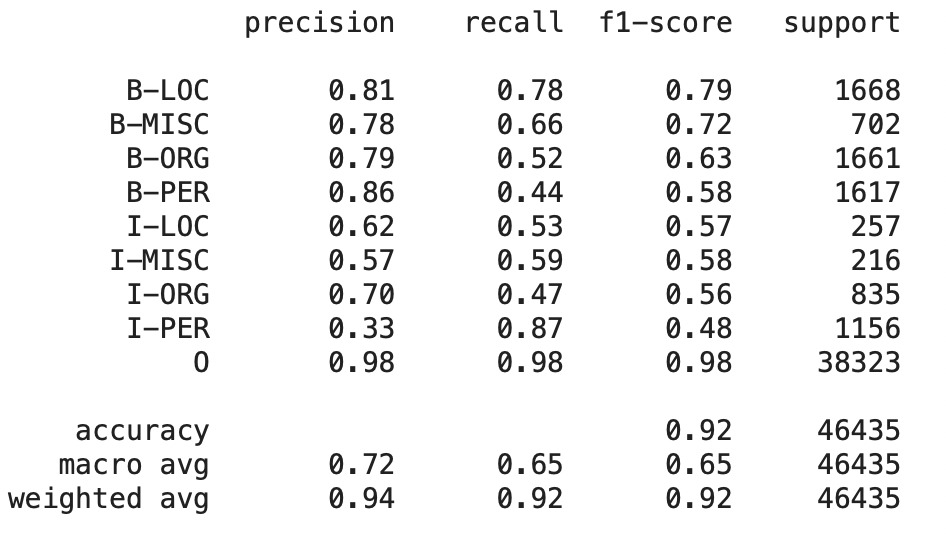

**[6 points] e) Train a model that uses the embeddings of these words as inputs. Test again on the same data as in 2d. Generate a classification report and compare the results with the classifier you built in 2d.**

In [1]:
import gensim

In [ ]:
word_embedding_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/lab4/GoogleNews-vectors-negative300 copy.bin', binary=True)  

In [ ]:
embedding_train=[]
embedding_gold_labels=[]
embedding_test=[]
embedding_gold_test_labels=[]
for token, pos, ne_label in train.iob_words():
    
    if token!='' and token!='DOCSTART':
        if token in word_embedding_model:
            vector=word_embedding_model[token]
        else:
            vector=[0]*300
        embedding_train.append(vector)
        embedding_gold_labels.append(ne_label)
        
for token, pos, ne_label in test.iob_words():
    
    if token!='' and token!='DOCSTART':
        if token in word_embedding_model:
            vector=word_embedding_model[token]
        else:
            vector=[0]*300
        embedding_test.append(vector)
        embedding_gold_test_labels.append(ne_label)

In [ ]:
lin_clf.fit(embedding_train, embedding_gold_labels)
predict_label = lin_clf.predict(embedding_test)
print(classification_report(embedding_gold_test_labels, predict_label))

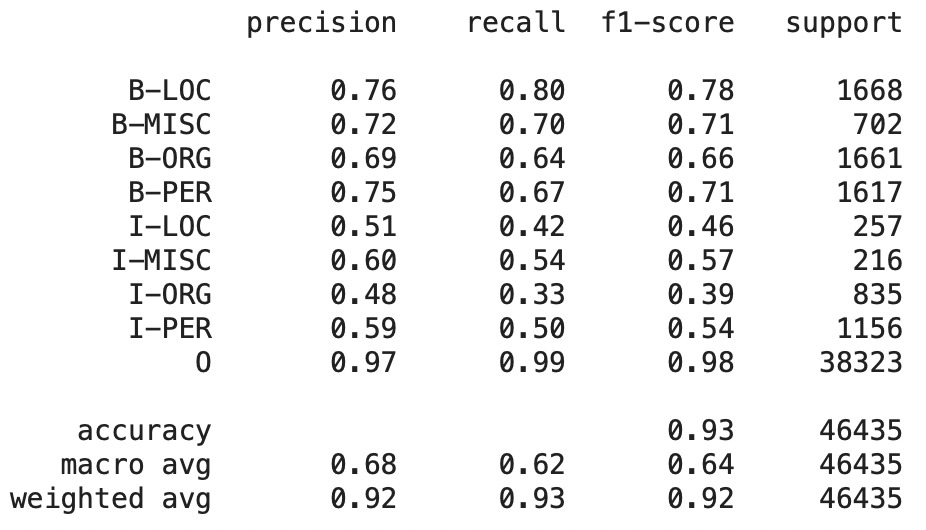

## [Points: 10] Exercise 2 (NERC): feature inspection using the [Annotated Corpus for Named Entity Recognition](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)
**[6 points] a. Perform the same steps as in the previous exercise. Make sure you end up for both the training part (*df_train*) and the test part (*df_test*) with:**
* the features representation using **DictVectorizer**
* the NERC labels in a list

Please note that this is the same setup as in the previous exercise:
* load both train and test using:
    * list of dictionaries for features
    * list of NERC labels
* combine train and test features in a list and represent them using one hot encoding
* train using the training features and NERC labels

In [ ]:
import pandas

In [ ]:
##### Adapt the path to point to your local copy of NERC_datasets
path = '/content/drive/MyDrive/Colab Notebooks/lab4/kaggle/ner_v2.csv'
kaggle_dataset = pandas.read_csv(path, error_bad_lines=False)

In [ ]:
len(kaggle_dataset)

In [ ]:
df_train = kaggle_dataset[:100000]
df_test = kaggle_dataset[100000:120000]
print(len(df_train), len(df_test))

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

training_features2 = []
training_gold_labels2 = df_train['tag']
test_features2 = []
test_gold_labels2 = test_labels = df_test['tag']
to_drop = ['id', 'sentence_idx', 'tag']
df_train = df_train.drop(columns=to_drop)
df_test = df_test.drop(columns=to_drop)
for index, row in df_train.iterrows():
    item = row.to_dict()
    training_features2.append(item)

for index, row in df_test.iterrows():
    item = row.to_dict()
    test_features2.append(item)

In [ ]:
print(training_features2[:100])

In [ ]:
print(test_features2[:100])

In [ ]:
the_array = vec.fit_transform(training_features2 + test_features2).toarray()

training = the_array[:len(training_features2)]
test = the_array[len(training_features2):]

In [ ]:
print(training)
print(test)

**[4 points] b. Train and evaluate the model and provide the classification report:**
* use the SVM to predict NERC labels on the test data
* evaluate the performance of the SVM on the test data

Analyze the performance per NERC label.

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
s = svm.LinearSVC()
s.fit(training, training_gold_labels2)
predict_label = s.predict(test)
print(classification_report(test_gold_labels2, predict_label))

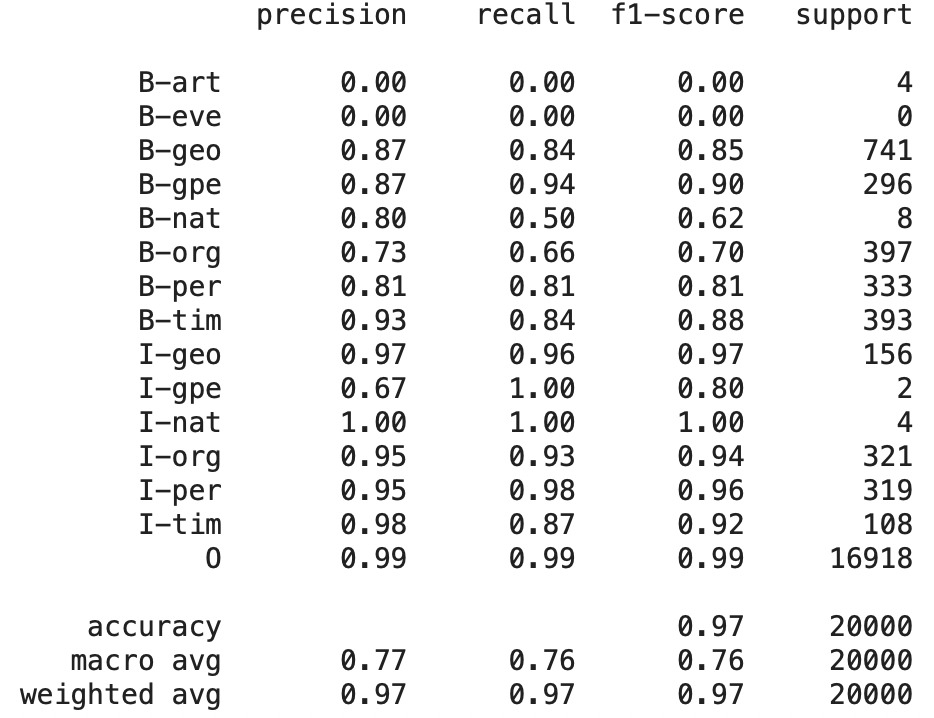


## End of this notebook